In [1]:
ENV["GKS_ENCODING"] = "utf-8"

"utf-8"

In [2]:
stateabbreviations = Dict("Alabama" => "AL",
    "Alaska" => "AK",
    "Arizona" => "AZ",
    "Arkansas" => "AR",
    "California" => "CA",
    "Colorado" => "CO",
    "Connecticut" => "CT",
    "Delaware" => "DE",
    "Florida" => "FL",
    "Georgia" => "GA",
    "Hawaii" => "HI",
    "Idaho" => "ID",
    "Illinois" => "IL",
    "Indiana" => "IN",
    "Iowa" => "IA",
    "Kansas" => "KS",
    "Kentucky" => "KY",
    "Louisiana" => "LA",
    "Maine" => "ME",
    "Maryland" => "MD",
    "Massachusetts" => "MA",
    "Michigan" => "MI",
    "Minnesota" => "MN",
    "Mississippi" => "MS",
    "Missouri" => "MO",
    "Montana" => "MT",
    "Nebraska" => "NE",
    "Nevada" => "NV",
    "New Hampshire" => "NH",
    "New Jersey" => "NJ",
    "New Mexico" => "NM",
    "New York" => "NY",
    "North Carolina" => "NC",
    "North Dakota" => "ND",
    "Ohio" => "OH",
    "Oklahoma" => "OK",
    "Oregon" => "OR",
    "Pennsylvania" => "PA",
    "Rhode Island" => "RI",
    "South Carolina" => "SC",
    "South Dakota" => "SD",
    "Tennessee" => "TN",
    "Texas" => "TX",
    "Utah" => "UT",
    "Vermont" => "VT",
    "Virginia" => "VA",
    "Washington" => "WA",
    "West Virginia" => "WV",
    "Wisconsin" => "WI",
    "Wyoming" => "WY", 
    "District of Columbia"=>"DC");

In [4]:
using Plots
using StatsPlots
gr()
using Statistics
using StatsBase
using MLBase

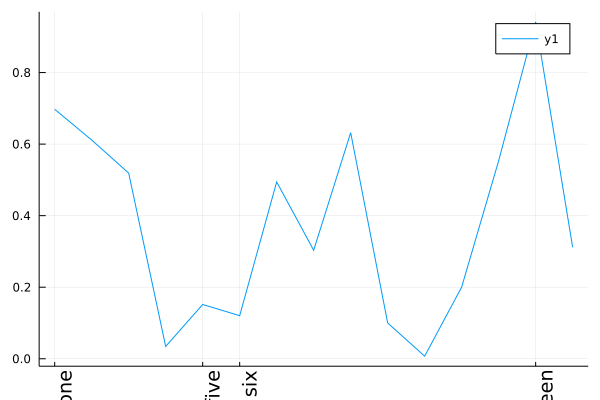

In [6]:
xticklabels = ["one", "five", "six", "fourteen"]
p = plot(rand(15), xticks = ([1, 5, 6, 14], xticklabels), xrotation=90, xtickfont=font(13))

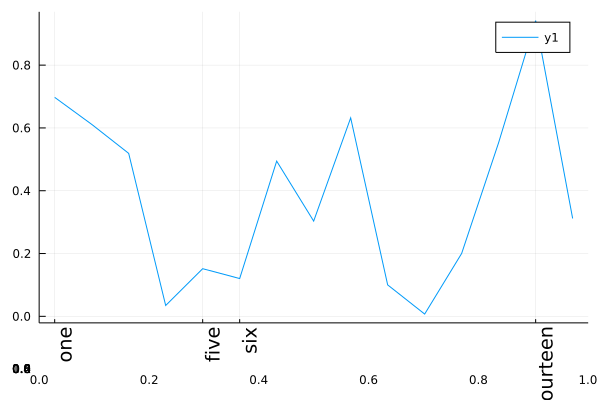

In [7]:
function pad_empty_plot(p)
    ep = plot(grid = false, legend = false, axis = false, framestyle = :box)
    newplot = plot(p, ep, layout=@layout([a{0.99h};b{0.001h}]))
    return newplot
end
pad_empty_plot(p)

In [8]:
using XLSX
using DataFrames
D = DataFrame(XLSX.readtable("C:/Users/kgtrm/Documents/VSC Code/jupyter stuff/zillow_data_download_april2020.xlsx", "Sales_median_price_city")...);
dropmissing!(D)
states = D[:,:StateName];

In [9]:
NYids = findall(states.=="New York")
NYframe = dropmissing(D[NYids,:])
CAids = findall(states.=="California")
CAframe = dropmissing(D[CAids,:])
FLids = findall(states.=="Florida")
FLframe = dropmissing(D[FLids,:])

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06
,Any,Any,Any,Any,Any,Any,Any,Any
1,13121,Orlando,Florida,21,222100,213700,201400,194400
2,12700,Miami,Florida,39,298900,297600,279400,261100
3,41176,Tampa,Florida,53,179400,164800,163500,163000
4,19533,Naples,Florida,71,294600,287400,283800,290900
5,47945,Tallahassee,Florida,73,183600,178900,172100,167200
6,26922,Saint Petersburg,Florida,89,156200,154900,148800,139200
7,53856,Pensacola,Florida,90,125300,124600,122900,121100
8,20362,Sarasota,Florida,100,233400,223400,218100,217000
9,53673,Ocala,Florida,118,138800,136000,132500,132200


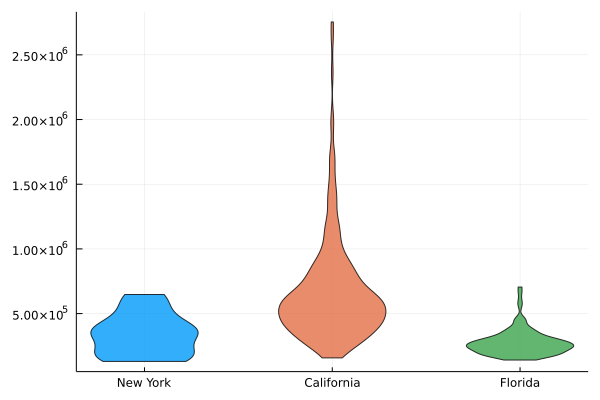

In [12]:
# pick a tear: 2020-02
ca = CAframe[!, Symbol("2020-02")]
ny = NYframe[!, Symbol("2020-02")]
fl = FLframe[!, Symbol("2020-02")]

violin(["New York"], ny, legend = false, alpha = 0.8)
violin!(["California"], ca, alpha = 0.8)
violin!(["Florida"], fl, alpha = 0.8)

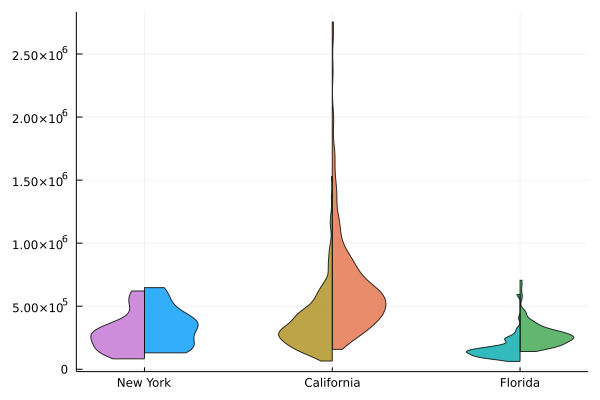

In [13]:
# 2020 data

ca = CAframe[!, Symbol("2020-02")]
ny = NYframe[!, Symbol("2020-02")]
fl = FLframe[!, Symbol("2020-02")]

violin(["New York"], ny, legend = false, alpha = 0.8, side= :right)
violin!(["California"], ca, alpha = 0.8, side= :right)
violin!(["Florida"], fl, alpha = 0.8, side= :right)

# 2010 data
ca10 = CAframe[!, Symbol("2010-02")]
ny10 = NYframe[!, Symbol("2010-02")]
fl10 = FLframe[!, Symbol("2010-02")]

violin!(["New York"], ny10, legend = false, alpha = 0.8, side= :left)
violin!(["California"], ca10, alpha = 0.8, side= :left)
violin!(["Florida"], fl10, alpha = 0.8, side= :left)

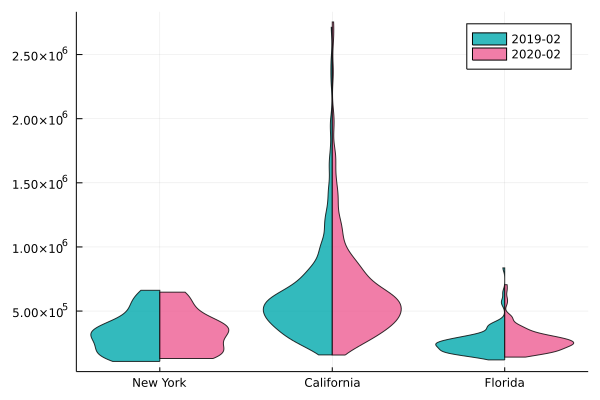

In [15]:
# no need for using many colors, let's just use one color for 2010 and one color for 2020

# pick a year: 2019-02

ca = CAframe[!, Symbol("2019-02")]
ny = NYframe[!, Symbol("2019-02")]
fl = FLframe[!, Symbol("2019-02")]

violin(["New York"], ny, alpha = 0.8, side= :left, color = 6, label = "2019-02")
violin!(["California"], ca, alpha = 0.8, side= :left, color = 6, label = "")
violin!(["Florida"], fl, alpha = 0.8, side= :left, color = 6, label = "")

# pick a year: 2020-02
ca20 = CAframe[!, Symbol("2020-02")]
ny20 = NYframe[!, Symbol("2020-02")]
fl20 = FLframe[!, Symbol("2020-02")]

violin!(["New York"], ny20, alpha = 0.8, side= :right, color = 7, label = "2020-02")
violin!(["California"], ca20, alpha = 0.8, side= :right, color = 7, label = "")
violin!(["Florida"], fl20, alpha = 0.8, side= :right, color = 7, label = "")

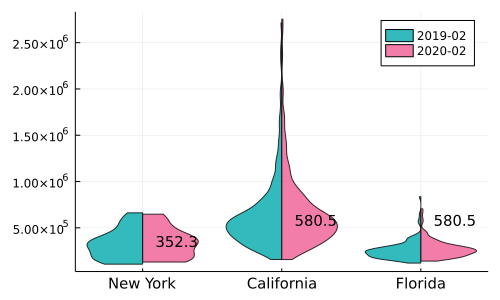

In [19]:
# no need for using many colors, let's just use one color for 2010 and one color for 2020

# pick a year: 2019-02

ca = CAframe[!, Symbol("2019-02")]
ny = NYframe[!, Symbol("2019-02")]
fl = FLframe[!, Symbol("2019-02")]

violin(["New York"], ny, alpha = 0.8, side= :left, color = 6, label = "2019-02")
violin!(["California"], ca, alpha = 0.8, side= :left, color = 6, label = "")
violin!(["Florida"], fl, alpha = 0.8, side= :left, color = 6, label = "")

# pick a year: 2020-02
ca = CAframe[!, Symbol("2020-02")]
ny = NYframe[!, Symbol("2020-02")]
fl = FLframe[!, Symbol("2020-02")]

violin!(["New York"], ny, alpha = 0.8, side= :right, color = 7, label = "2020-02")
violin!(["California"], ca, alpha = 0.8, side= :right, color = 7, label = "")
violin!(["Florida"], fl, alpha = 0.8, side= :right, color = 7, label = "")

m = median(ny)
ep = 0.1
annotate!([(0.5+ep, m+0.05, text(m/1000, 10, :left))])

m = median(ca)
ep = 0.1
annotate!([(1.5+ep, m+0.05, text(m/1000, 10, :left))])

median(fl)
ep = 0.1
annotate!([(2.5+ep, m+0.05, text(m/1000, 10, :left))])

plot!(xtickfont = font(10), size = (500, 300))

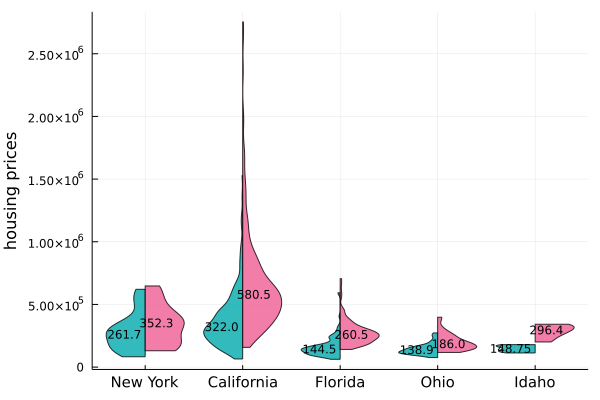

In [21]:
# putting it together

ep = 0.05 # will be used later in padding for annotations

# set up the plot
plot(xtickfont=font(10))

states_of_interest = ["New York", "California", "Florida", "Ohio", "Idaho"]
years_of_interest = [Symbol("2010-02"), Symbol("2020-02")]

# year 1
xstart = 0.5
yi = years_of_interest[1]
for si in states_of_interest
    curids = findall(states.==si)
    curFrame = D[curids,:]
    curprices = curFrame[!,yi]
    m = median(curprices)
    annotate!([(xstart-ep, m+0.05, text(m/1000,8,:right))])
    xstart += 1
    violin!([si], curprices, alpha = 0.8, side = :left, color = 6, label = "")
end
plot!(color = 6, label = yi)

# year 2
xstart = 0.5
yi = years_of_interest[2]
for si in states_of_interest
    curids = findall(states.==si)
    curFrame = D[curids,:]
    curprices = curFrame[!,yi]
    m = median(curprices)
    annotate!([(xstart-ep, m+0.05, text(m/1000,8,:left))])
    xstart += 1
    violin!([si], curprices, alpha = 0.8, side = :right, color = 7, label = "")
end
plot!(color=7, label=yi)
ylabel!("housing prices")

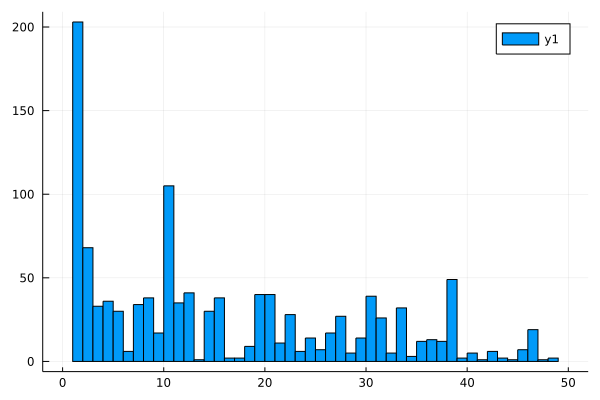

In [23]:
mapstates = labelmap(states)
stateids = labelencode(mapstates, states)
histogram(stateids, nbins = length(mapstates))

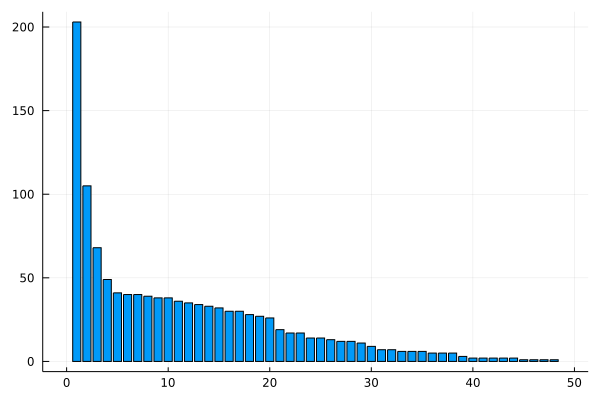

In [24]:
# first we'll start with sorting
h = fit(Histogram, stateids, nbins = length(mapstates))
sortedids = sortperm(h.weights, rev=true)
bar(h.weights[sortedids], legend=false)

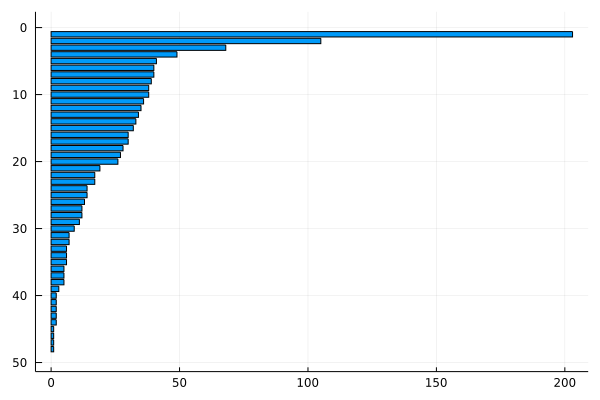

In [28]:
bar(h.weights[sortedids], legend=false, orientation = :horizontal, yflip=true)

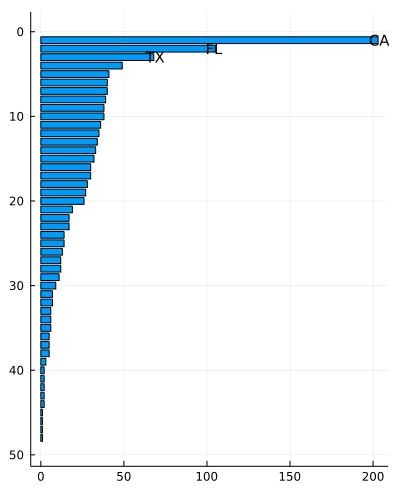

In [36]:
# just an example of annotations
bar(h.weights[sortedids], legend = false, orientation = :horizontal, yflip=true, size = (400,500))
stateannotations = mapstates.vs[sortedids]
for i = 1:3
    annotate!([(h.weights[sortedids][i]-5, i, text(stateabbreviations[stateannotations[i]], 10, :left))])
end
plot!()

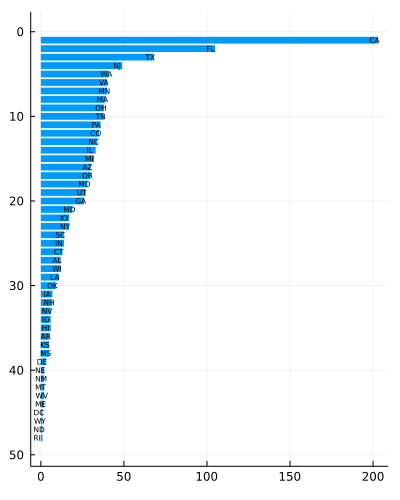

In [37]:
bar(h.weights[sortedids],legend=false,orientation = :horizontal,yflip=true,linewidth=0,width=0,size=(400,500))
stateannotations = mapstates.vs[sortedids]
for i = 1:length(stateannotations)
    annotate!([(h.weights[sortedids][i]-5,i,text(stateabbreviations[stateannotations[i]],5,:left))])
end
plot!()

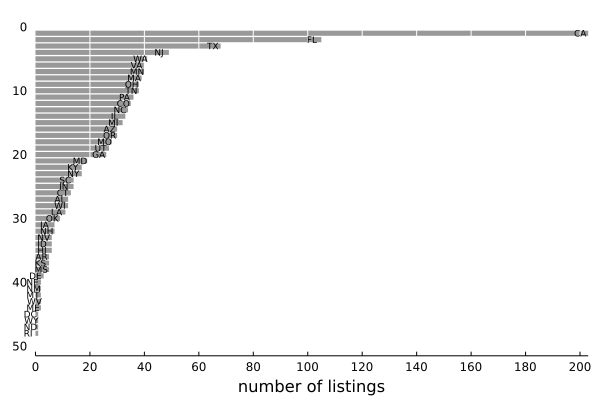

In [38]:
bar(h.weights[sortedids],legend=false,orientation = :horizontal,yflip=true,linewidth=0,width=0,color=:gray,alpha=0.8)
stateannotations = mapstates.vs[sortedids]
for i = 20:20:200
    plot!([i,i],[50,0],color=:white)
end
for i = 1:length(stateannotations)
    annotate!([(h.weights[sortedids][i]-5,i,text(stateabbreviations[stateannotations[i]],6,:left))])
end
plot!(grid=false,yaxis=false,xlim=(0,maximum(h.weights)),xticks = 0:20:200)
xlabel!("number of listings")

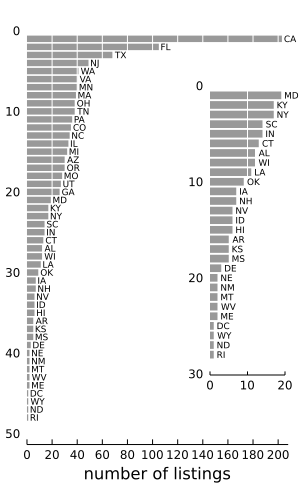

In [41]:
bar(h.weights[sortedids],legend=false,orientation = :horizontal,yflip=true,linewidth=0,color=:gray,alpha=0.8,size=(300,500))
stateannotations = mapstates.vs[sortedids]
ht = length(h.weights)
for i = 20:20:200
    plot!([i,i],[ht,0],color=:white)
end
for i = 1:length(stateannotations)
    annotate!([(h.weights[sortedids][i]+2,i,text(stateabbreviations[stateannotations[i]],6,:left))])
end
plot!(grid=false,yaxis=false,xlim=(0,maximum(h.weights)+5),xticks = 0:20:200)
xlabel!("number of listings")

f = Plots.plot!(inset = bbox(0.7,0.15,0.25,0.6,:top,:left))
bar!(f[2],h.weights[sortedids][21:end],legend=false,orientation = :horizontal,yflip=true,linewidth=0,width=0,color=:gray,alpha=0.8)
for i = 21:length(stateannotations)
    annotate!(f[2],[(h.weights[sortedids][i]+1,i-20,text(stateabbreviations[stateannotations[i]],6,:left))])
end
plot!(f[2],[10,10],[20,0],color=:white,xticks=0:10:20,yaxis=false,grid=false,xlim=(0,20))
plot!()

In [44]:
M = Matrix(NYframe[:, 5:end])

17×144 Matrix{Any}:
 478300  474800  486700  489800  502700  …  543100  546900  537500  538900
 163600  164200  155100  149600  151200     165500  173300  173700  182500
 671000  653500  634700  631600  620400     623500  651700  631600  649200
 589800  611100  573600  628100  599000     625600  622400  633400  628800
 247400  250100  225400  192600  196500     286400  278700  262200  281500
 318100  302200  293300  279400  279800  …  340300  338000  337900  344000
 353400  344100  343000  343100  343100     354500  377600  377600  399700
 411700  398900  402900  410500  420600     506300  493300  508700  502800
 138900  134600  133600  136600  135300     162400  158500  160100  154800
 350800  341500  340300  339400  336000     395800  394400  391300  393900
 369600  383600  405600  411400  419300  …  394300  391400  381100  359500
  69500   67000   73800   72300   80900      99300  117700  116600  128400
  96600  103500  103700  108800  106500     149700  153400  153000  150400
 1414

In [45]:
xtickslabels = string.(names(NYframe[!,5:end]))

144-element Vector{String}:
 "2008-03"
 "2008-04"
 "2008-05"
 "2008-06"
 "2008-07"
 "2008-08"
 "2008-09"
 "2008-10"
 "2008-11"
 "2008-12"
 "2009-01"
 "2009-02"
 "2009-03"
 ⋮
 "2019-03"
 "2019-04"
 "2019-05"
 "2019-06"
 "2019-07"
 "2019-08"
 "2019-09"
 "2019-10"
 "2019-11"
 "2019-12"
 "2020-01"
 "2020-02"

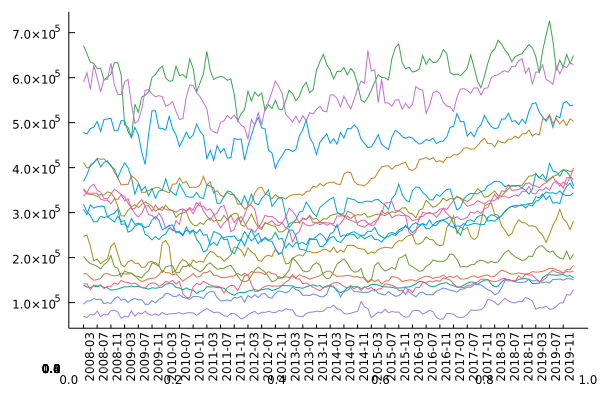

In [46]:
plot()
for i = 1:size(M, 1)
    plot!(M[i,:], legend=false)
end
plot!()
p = plot!(xticks = (1:4:length(xtickslabels), xtickslabels[1:4:end]), xrotation=90, xtickfont = font(8), grid = false)
pad_empty_plot(p)

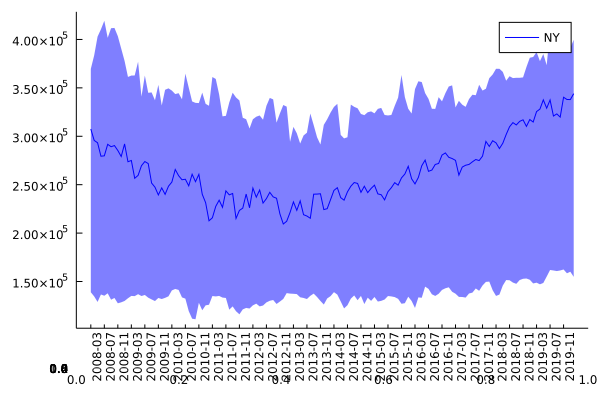

In [49]:
function find_percentile(M, pct)
    r = zeros(size(M,2))
    for i = 1:size(M,2)
        v = M[:, i]
        len = length(v)
        ind = floor(Int64, pct*len)
        newarr = sort(v)
        r[i] = newarr[ind];
    end
    return r
end

md = find_percentile(M, 0.5)
mx = find_percentile(M, 0.8)
mn = find_percentile(M, 0.2)
plot(md, ribbon = (md.-mn, mx.-md), color = :blue, label = "NY", grid=false)
p = plot!(xticks = (1:4:length(xtickslabels), xtickslabels[1:4:end]), xrotation=90,xtickfont=font(8))
pad_empty_plot(p)

In [50]:
function plot_individual_state!(plotid, statevalue, colorid)
    curids = findall(states.==statevalue)
    curFrame = D[curids,:]
    M = Matrix(curFrame[:, 5:end])
    md = find_percentile(M, 0.5)
    mx = find_percentile(M, 0.8)
    mn = find_percentile(M, 0.2)
    plot!(plotid, md, ribbon = (md.-mn, mx.-md), color = colorid, label = stateabbreviations[statevalue], grid=false)
    plot!(plotid, xticks = (1:4:length(xtickslabels), xtickslabels[1:4:end]), xrotation=90, xtickfont = font(8))
end


plot_individual_state! (generic function with 1 method)

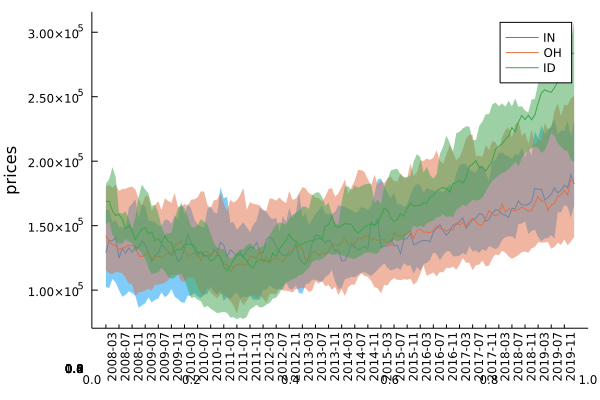

In [54]:
plotid = plot()
plot_individual_state!(plotid, "Indiana", 1)
plot_individual_state!(plotid, "Ohio", 2)
plot_individual_state!(plotid, "Idaho", 3)
# plot_individual_state!(plotid, "California", 4)
ylabel!("prices")
pad_empty_plot(plotid)

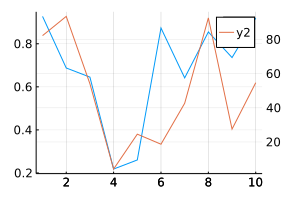

In [55]:
vector1 = rand(10)
vector2 = rand(10) * 100
plot(vector1, label = "b", size = (300,200))
plot!(twinx(), vector2, color=2, axis=false)

In [56]:
xtickslabels = NYframe[!,:RegionName]

17-element Vector{Any}:
 "Yonkers"
 "Schenectady"
 "New Rochelle"
 "White Plains"
 "Town Of Ithaca"
 "Patchogue"
 "Lindenhurst"
 "Hicksville"
 "Liverpool"
 "West Babylon"
 "Town Of Carmel"
 "Rome"
 "North Tonawanda"
 "Town Of Cicero"
 "Centereach"
 "Town of Manlius"
 "Selden"

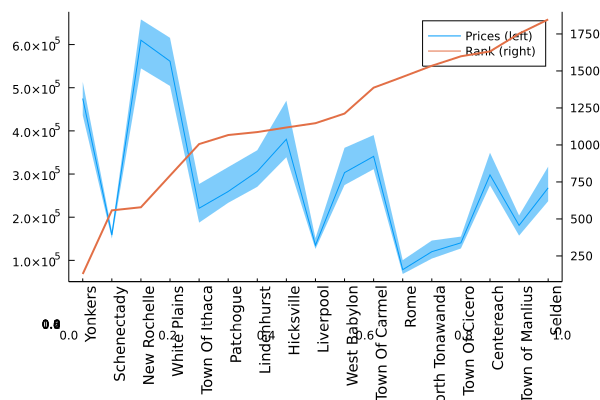

In [60]:
sz = NYframe[!, "SizeRank"]
pc = NYframe[!,end]
M = Matrix(NYframe[:,5:end])
M = copy(M')

md = find_percentile(M, 0.5)
mx = find_percentile(M, 0.9)
mn = find_percentile(M, 0.1)
vector1 = sz

plot()
plot!(md, ribbon = (md.-mn, mx.-md), color=1, grid = false, label = "")

plot!(xticks = (1:length(xtickslabels), xtickslabels), xrotation=90, xtickfont=font(10))
plot!(twinx(), vector1, color=2, label="", ylabel="rank", grid=false, xticks=[], linewidth=2)
plot!([],[],color=1, label= "Prices (left)")
p = plot!([],[],color=2, label = "Rank (right)")
ep = plot(grid=false, legend = false, axis = false, framestyle = :box) # empty plot
plot(p, ep, layout = @layout([a{0.85h};b{0.001h}]))

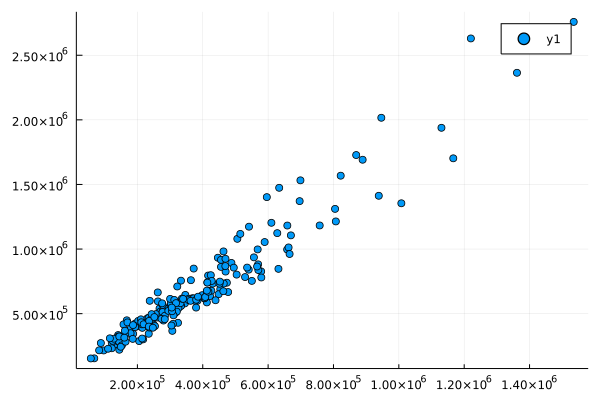

In [61]:
CA202002 = CAframe[!, Symbol("2020-02")]
CA201002 = CAframe[!, Symbol("2010-02")]
scatter(CA201002,CA202002)

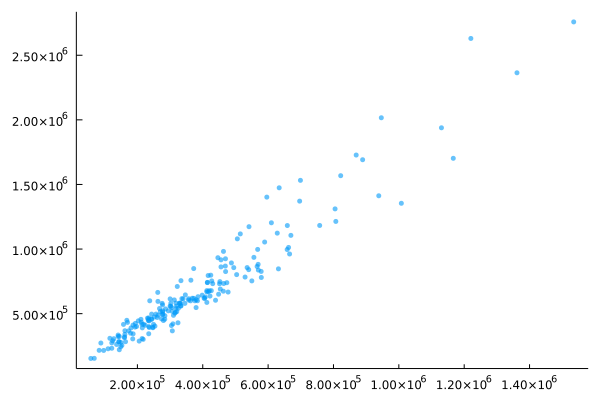

In [63]:
CA202002 = CAframe[!, Symbol("2020-02")]
CA201002 = CAframe[!, Symbol("2010-02")]
CAranks = CAframe[!,:SizeRank]
scatter(CA201002, CA202002, legend=false, markerstrokewidth=0,markersize=3,alpha=0.6,grid=false)

In [66]:
using ColorSchemes

In [67]:
# normalize the ranks to be between 0 and 1
continuousranks = CAranks./maximum(CAranks)

# create a placeholder vector that will store the color of each value
colorsvec = Vector{RGB{Float64}}(undef, length(continuousranks))

# and finally map the colors according to ColorSchemes.autumn1, there are many other schemes you can choose from
map(i -> colorsvec[i]=get(ColorSchemes.autumn1, continuousranks[i]),1:length(colorsvec))

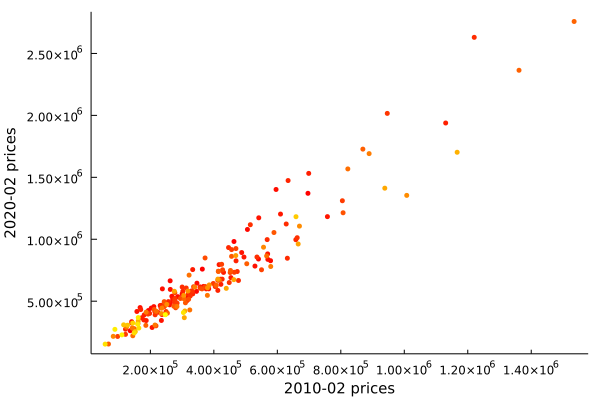

In [68]:
continuousdates = CAranks./maximum(CAranks)
colorsvec = Vector{RGB{Float64}}(undef, length(continuousdates))
map(i -> colorsvec[i]=get(ColorSchemes.autumn1, continuousdates[i]), 1:length(colorsvec))
scatter(CA201002,CA202002,color=colorsvec, legend=false, markerstrokewidth=0, markersize=3,grid=false)
xlabel!("2010-02 prices", xguidefontsize=10)
ylabel!("2020-02 prices", yguidefontsize=10)
p1 =plot!()

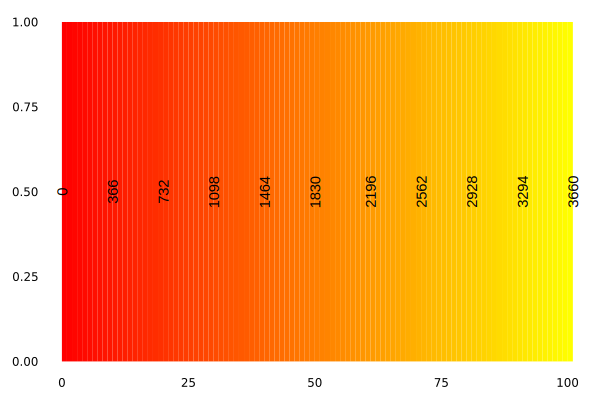

In [70]:
# set up the plot canvas
xvals = 0:100
s = Shape([0,1,1,0],[0,0,1,1])
plot(s, color=ColorSchemes.autumn1[1],grid=false,axis=false,legend=false,linewidth=0,linecolor=nothing)

for i = 2:101
    s = Shape([xvals[i], xvals[i] + 1, xvals[i] + 1, xvals[i]],[0,0,1,1])
    plot!(s, color=ColorSchemes.autumn1[i],grid=false,axis=false, legend=false,linewidth=0,linecolor=nothing)
end

mynormalizer = maximum(CAranks)
xtickslabels = 0:div(mynormalizer,10):mynormalizer
continuousdates = xtickslabels./mynormalizer
xticksloc = round.(Int, continuousdates.*101)

# annotate using the ranks
rotatedfont = font(10, "Helvetica", rotation=90)
for i = 1:length(xtickslabels)
    annotate!(xticksloc[i], 0.5, text(xtickslabels[i],rotatedfont))
end
p2 = plot!()

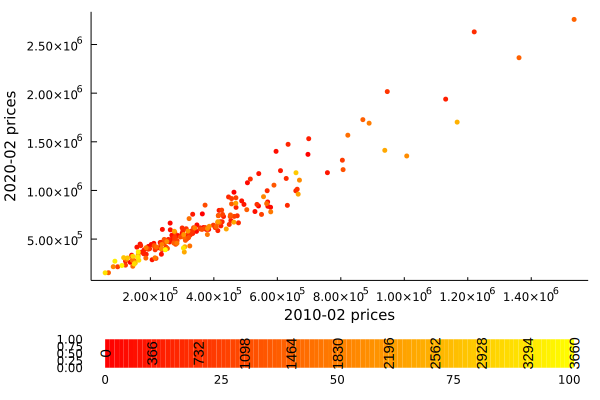

In [71]:
mylayout = @layout([a{0.89h};b{0.1h}])
plot(p1, p2, layout = mylayout)